In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
from statsmodels.datasets import grunfeld
from linearmodels.panel  import PanelOLS
import pandas as pd
import build_data_functions as bdf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import model_functions as mf
import plot_model_functions as pmf
import panelOLS_models 
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import pycountry

In [2]:
years = list(range(2005, 2017))

In [3]:
y = pd.read_table("/home/sara/Documents/Immigration/Shared_models/Data/resident_foreigners_norm.csv", sep = "\t", index_col=0)
y = y.groupby(["Province", "Country", "Year"], as_index=False)["Value"].sum()
y = bdf.pivot(y, "Country", "Value")

#unesco_demo = pd.read_table("/home/sara/Documents/Immigration/Shared_models/Data/countries_info.csv", sep = "\t", index_col=0)

## Zone level

In [4]:
xs = pd.read_table("/home/sara/Documents/Immigration/Shared_models/Data/x_zones.csv", sep = "\t", index_col=["Province", "Year"])

zones_data = pd.read_table("/home/sara/Documents/Immigration/Shared_statistics/Data_final/territori.csv")
zones_data = zones_data.replace(['Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento'], ['Bolzano / Bozen', 'Trento'])

In [5]:
unesco_demo = pd.read_table("/home/sara/Documents/Immigration/Shared_models/Data/countries_info.csv", sep = "\t", index_col=[0,1])

In [6]:
xs.head()

native population - Total  \
Province Year                              
Centro   2005                   11132123   
         2006                   11187269   
         2007                   11238482   
         2008                   11364120   
         2009                   11472911   

               internal_migration - Foreign country  \
Province Year                                         
Centro   2005                               33238.0   
         2006                               35697.0   
         2007                               35215.0   
         2008                               41501.0   
         2009                               45472.0   

               internal_migration - Italy  reach_difficulty - Pharmacy  \
Province Year                                                            
Centro   2005                    216642.0                       1006.0   
         2006                    210115.0                       1044.0   
         2007                    207195.0                       1024.0   
         2008                    222354.0                       1070.0   
         2009                    199980.0                       1106.0   

               reach_difficulty - Food stores, markets  \
Province Year                                            
Centro   2005                                    849.0   
         2006                                    997.0   
         2007                                    947.0   
         2008                                   1012.0   
         2009                                   1028.0   

               reach_difficulty - Police, carabinieri  \
Province Year                                           
Centro   2005                                  1608.0   
         2006                                  1731.0   
         2007                                  1701.0   
         2008                                  1727.0   
         2009                                  1713.0   

               reach_difficulty - Emergency room  \
Province Year                                      
Centro   2005                             2334.0   
         2006                             2428.0   
         2007                             2447.0   
         2008                             2535.0   
         2009                             2655.0   

               reach_difficulty - Supermarket  \
Province Year                                   
Centro   2005                          1243.0   
         2006                          1435.0   
         2007                          1374.0   
         2008                          1438.0   
         2009                          1345.0   

               reach_difficulty - Municipal offices  \
Province Year                                         
Centro   2005                                1846.0   
         2006                                1894.0   
         2007                                1770.0   
         2008                                1867.0   
         2009                                2014.0   

               reach_difficulty - Post offices          ...           \
Province Year                                           ...            
Centro   2005                           1214.0          ...            
         2006                           1276.0          ...            
         2007                           1244.0          ...            
         2008                           1262.0          ...            
         2009                           1309.0          ...            

               political_info - A time per week  Free activity for a union  \
Province Year                                                                
Centro   2005                             317.0                      161.0   
         2006                             354.0                      169.0   
         2007                             313.0                      164.0   
    

#### Feature selection
Select features according to the k highest scores. The score function used is mutual information.

In [7]:
palette = ['blue', 'darkgreen', 'yellowgreen', 'orange', 'lightcoral', 'red', 'paleturquoise', 'deepskyblue', 'mediumpurple', 'fuchsia']

### ROMANIA

--------------------- Previous  Time ---------------------
R-squared 0.983000.
Adjusted R-squared 1.074000.
y_prev_1    1.074432
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.982000.
Adjusted R-squared 1.074000.
y_prev_1    1.084406
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.984000.
Adjusted R-squared 1.067000.
y_prev_1    1.362724
y_prev_2   -0.320482
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.984000.
Adjusted R-squared 1.067000.
y_prev_1    1.359330
y_prev_2   -0.308215
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.988000.
Adjusted R-squared 1.050000.
y_prev_1                                                      1.001708
y_prev_2                                                     -0.118216
native population - Total                                    -0.010692
Free ac

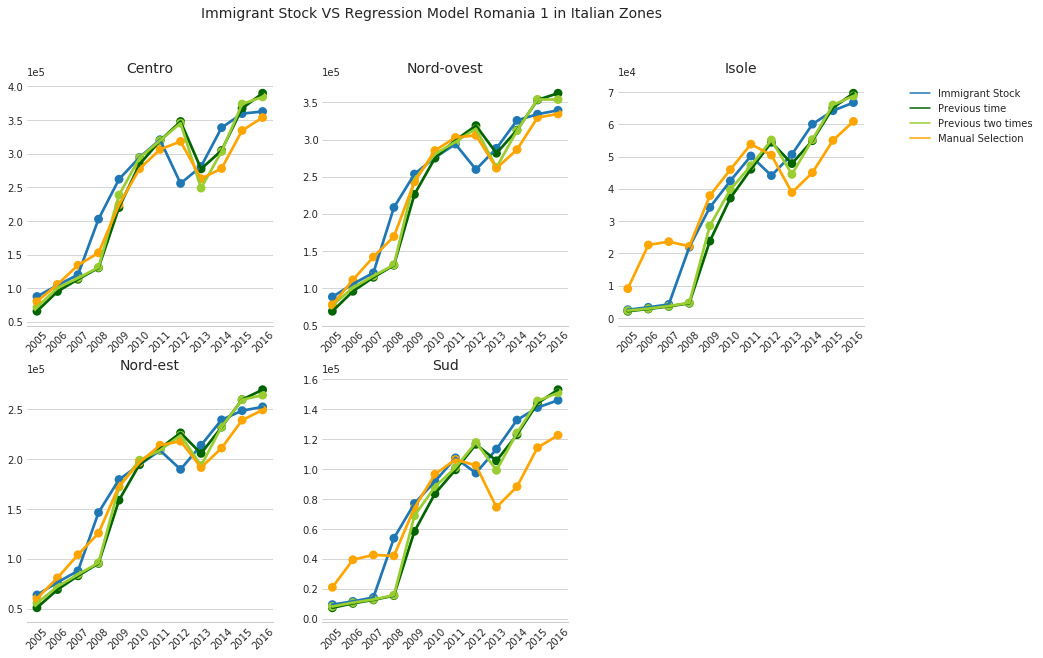

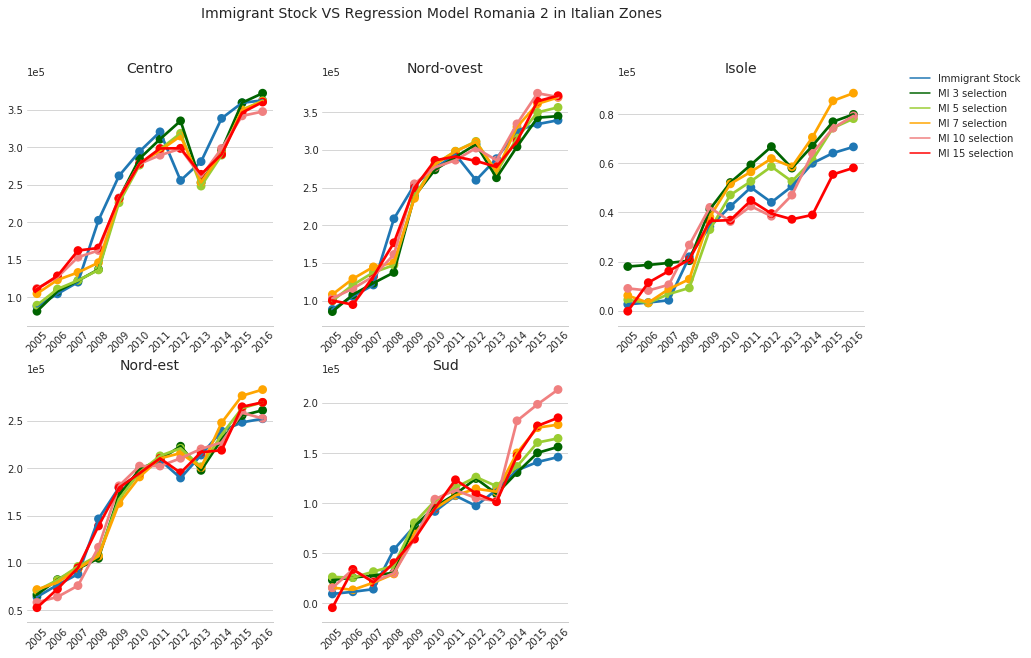

In [9]:
country = "Romania"
country = pycountry.countries.get(name=country).alpha_3


temp = unesco_demo.loc[(years, country), :]
temp.index = temp.index.droplevel(1)
temp = pd.concat([temp for i in range(len(xs.index.levels[0].tolist())) ], keys=xs.index.levels[0].tolist(), names=['Province'])

xs_plus = pd.read_table("/home/sara/Documents/Immigration/Shared_models/Data/x_zones.csv", sep = "\t", index_col=["Province", "Year"])
xs_plus = pd.concat([xs_plus, temp], axis=1)

panelOLS_models.panel_regression(y, xs_plus, years, "Romania", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model Romania", save_final = False)

### MOROCCO

--------------------- Previous  Time ---------------------
R-squared 0.996000.
Adjusted R-squared 0.996000.
y_prev_1    1.028987
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.996000.
Adjusted R-squared 0.996000.
y_prev_1    1.04329
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.997000.
Adjusted R-squared 0.996000.
y_prev_1    1.418990
y_prev_2   -0.407382
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.996000.
Adjusted R-squared 0.996000.
y_prev_1    1.346556
y_prev_2   -0.319917
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.997000.
Adjusted R-squared 0.997000.
y_prev_1                                                      0.997305
y_prev_2                                                     -0.083266
native population - Total                                     0.001943
Free act

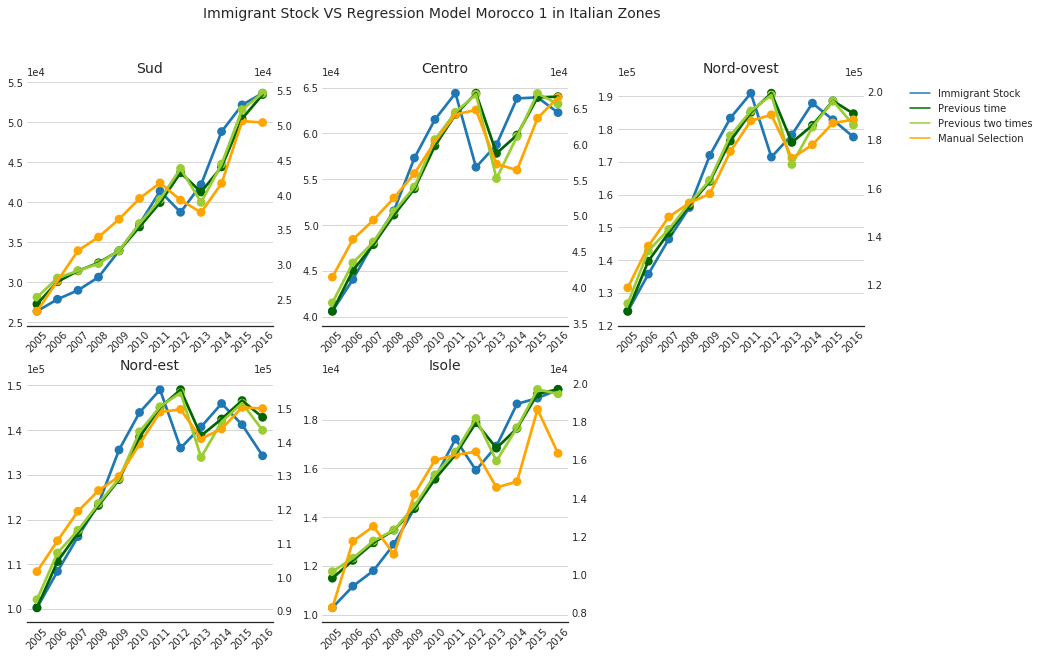

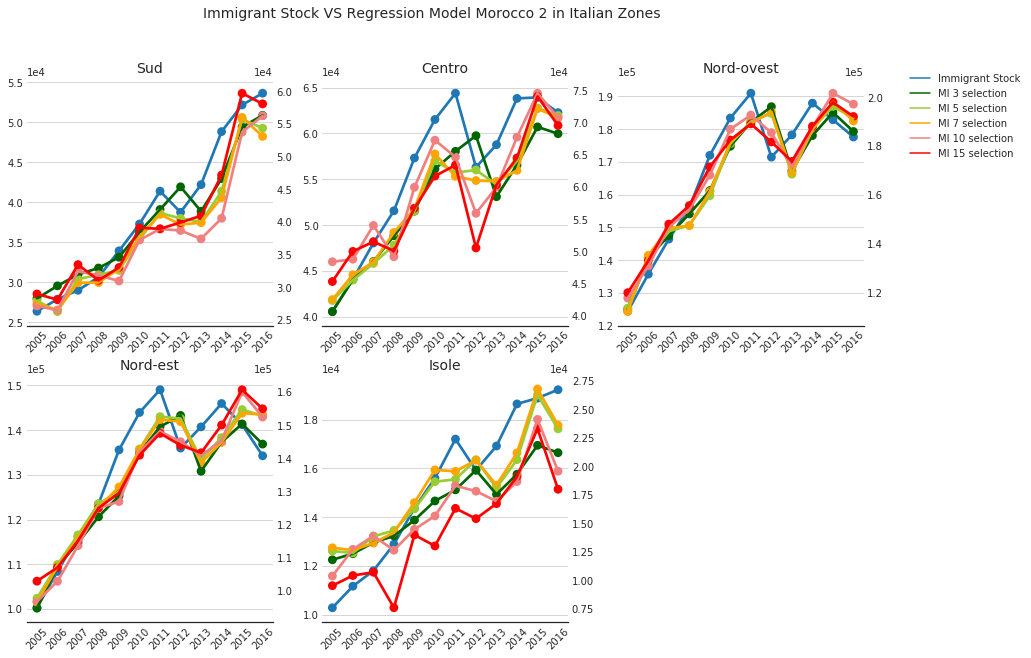

In [11]:
panelOLS_models.panel_regression(y, xs, years, "Morocco", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model Morocco", save_final=False)

### ALBANIA

In [9]:
panelOLS_models.panel_regression(y, xs, years, "Albania", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model Albania")

--------------------- Previous  Time ---------------------
R-squared 0.996000.
Adjusted R-squared 0.996000.
y_prev_1    1.032319
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.996000.
Adjusted R-squared 0.996000.
y_prev_1    1.048695
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.998000.
Adjusted R-squared 0.998000.
y_prev_1    1.623447
y_prev_2   -0.621474
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.998000.
Adjusted R-squared 0.998000.
y_prev_1    1.568186
y_prev_2   -0.552580
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.998000.
Adjusted R-squared 0.998000.
y_prev_1                                                      1.402861
y_prev_2                                                     -0.420450
native population - Total                                     0.002633
Free ac

### TUNISIA

In [10]:
panelOLS_models.panel_regression(y, xs, years, "Tunisia", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model Tunisia")

--------------------- Previous  Time ---------------------
R-squared 0.991000.
Adjusted R-squared 0.991000.
y_prev_1    1.015228
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.991000.
Adjusted R-squared 0.991000.
y_prev_1    1.015138
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.991000.
Adjusted R-squared 0.991000.
y_prev_1    1.138940
y_prev_2   -0.127835
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.991000.
Adjusted R-squared 0.991000.
y_prev_1    1.131116
y_prev_2   -0.119564
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1                                                      0.559878
y_prev_2                                                      0.092056
native population - Total                                    -0.000595
Free ac

### EGYPT

In [11]:
panelOLS_models.panel_regression(y, xs, years, "Egypt", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model Egypt")

--------------------- Previous  Time ---------------------
R-squared 0.984000.
Adjusted R-squared 0.984000.
y_prev_1    1.062896
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.984000.
Adjusted R-squared 0.983000.
y_prev_1    1.03881
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.984000.
Adjusted R-squared 0.984000.
y_prev_1    1.009317
y_prev_2    0.058211
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.983000.
Adjusted R-squared 0.983000.
y_prev_1    0.893476
y_prev_2    0.153555
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.985000.
Adjusted R-squared 0.985000.
y_prev_1                                                      0.948951
y_prev_2                                                      0.102265
native population - Total                                     0.000532
Free act

### ECUADOR

In [12]:
panelOLS_models.panel_regression(y, xs, years, "Ecuador", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model Ecuador")

--------------------- Previous  Time ---------------------
R-squared 0.990000.
Adjusted R-squared 0.990000.
y_prev_1    1.040263
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.990000.
Adjusted R-squared 0.989000.
y_prev_1    1.054755
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.993000.
Adjusted R-squared 0.993000.
y_prev_1    1.551544
y_prev_2   -0.547614
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.993000.
Adjusted R-squared 0.993000.
y_prev_1    1.566581
y_prev_2   -0.556437
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.994000.
Adjusted R-squared 0.994000.
y_prev_1                                                     1.426175
y_prev_2                                                    -0.408234
native population - Total                                    0.001136
Free activ

### PERU

In [13]:
panelOLS_models.panel_regression(y, xs, years, "Peru", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model Peru")

--------------------- Previous  Time ---------------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    1.049183
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.994000.
Adjusted R-squared 0.994000.
y_prev_1    1.075437
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    1.428997
y_prev_2   -0.408379
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.995000.
Adjusted R-squared 0.994000.
y_prev_1    1.284157
y_prev_2   -0.227779
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.996000.
Adjusted R-squared 0.996000.
y_prev_1                                                     1.269530
y_prev_2                                                    -0.221002
native population - Total                                    0.000697
Free activ

### CHINA

In [14]:
panelOLS_models.panel_regression(y, xs, years, "China", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model China")

--------------------- Previous  Time ---------------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    1.073424
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    1.087049
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    1.093903
y_prev_2   -0.022378
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    1.041113
y_prev_2    0.049962
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.996000.
Adjusted R-squared 0.996000.
y_prev_1                                                     0.909772
y_prev_2                                                     0.121144
native population - Total                                    0.000714
Free activ

### PHILIPPINES

In [13]:
panelOLS_models.panel_regression(y, xs, years, "Philippines", [3, 5, 7, 10, 15], zones_data, palette, "Regression Model Philippines")

--------------------- Previous  Time ---------------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    1.058514
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    1.063467
Name: parameter, dtype: float64
-------------------- Previous 2 Times --------------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    0.926564
y_prev_2    0.142281
Name: parameter, dtype: float64
-------------- Trainin-Test  Results --------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1    0.955000
y_prev_2    0.115699
Name: parameter, dtype: float64
------------- Variable Selection  Plot based -------------
R-squared 0.995000.
Adjusted R-squared 0.995000.
y_prev_1                                                     0.902895
y_prev_2                                                     0.199113
native population - Total                                    0.001291
Free activ